<a href="https://colab.research.google.com/github/Gnkhakimova/CS5590-BigData/blob/master/FinalProjectHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House price prediction using Deep Learning 

[Previous increments report](https://github.com/Gnkhakimova/CS5590-BigData/wiki/Project)  
 [Video presentation](https://www.youtube.com/watch?v=SIjP9joqMZQ)

Deep learning belong to machine learning which uses artificial neural network to perform prediction. Deep learning is used in many industries nowadays, such as computer vision, natural language processing, image recognition, board games and etc. Deep learning has different types of architectures like: Convolutional neural network, Deep neural network, Recurrent neural network, etc. There are two types of deep learning: supervised and not supervised. Supervised learning will expect that human will control process of training a model by labeling dataset, form which model learns to make predictions. Unsupervised learning does not need human assistance, model will learn on it is own without labeling data. For final project we implemented house price prediction model using deep learning. Our model will predict if listed price is above or below average, example will be Zillow which helps buyers to identify if listed house price is at average range or not, which helps us not to overpay for house. 

Import panda library

In [0]:
import pandas as pd

Import dataset and store it into "data" variable. 



In [0]:
data = pd.read_csv('dataset.csv')

Display dataset

In [0]:
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


We need to convert dataset into array so out model can work on it.

In [0]:
dataset = data.values

In [0]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Here we are partitioning dataset, by defining input features, which will be first 10 columns.

In [0]:
input_features = dataset[:,0:10]

Also we are setting our predicted value, which will be our last column.

In [0]:
predicted_value = dataset[:,10]

Importing processing method form sklearn library, we do not need to import whole library we can just import function which we need for our project.

In [0]:
from sklearn import preprocessing

In order for our model to be trained first we need to prepare dataset, since our model will not be able to perform any operations if data is not clean. Usually 80% of time is spend to clean data while implementing neural network model, because datasets is not normalized and might miss some data, which is not not helpful when training a model.

To normalize our dataset we will use MinMaxScaler method which transform our data into range form 0 to 1

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(input_features)

Lets display our normalized data. 

In [0]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Importing needed function from libraries. 

In [0]:
from sklearn.model_selection import train_test_split

Since we do not have test dataset we will use given dataset and devide into two parts, training dataset and test dataset, which will evaluate our model. sklearn already has function which will help us to split our data.  

In [0]:
input_feature_train, input_feature_val_and_test, predicted_value_train, predicted_value_val_and_test = train_test_split(X_scale, predicted_value, test_size=0.2)

In [0]:
input_feature_val, input_feature_test, predicted_val, predicted_test = train_test_split(input_feature_val_and_test, predicted_value_val_and_test, test_size=0.6)

In [0]:
print(input_feature_train.shape, input_feature_val.shape, input_feature_test.shape, predicted_value_train.shape, predicted_val.shape, predicted_test.shape)

(1168, 10) (116, 10) (176, 10) (1168,) (116,) (176,)


# Create Neural Network model

We will use keras library to create a model, lets import needed functions from library. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


For our model we decinded to use Sequebtial model, which consist of four layers: 3 Hidden layers and one output layer. For activation function we are using ReLu. Activation functions transforms all negarive values to 0.   
![alt text](https://github.com/Gnkhakimova/CS5590-BigData/blob/master/Project/Screenshots/relu.JPG?raw=true)



Variable input_shape means numer of input features. Output activation function is Sigmoid, which gives us values between 0 and 1, it is mostly used for model which needs prediction propability.  
![alt text](https://github.com/Gnkhakimova/CS5590-BigData/blob/master/Project/Screenshots/sigmoid.JPG?raw=true)

In [0]:
predict_price_model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Next step will be defining optimazation function, we are using stochastic gradient descent, it selects random values in order to find Gradient Descent (it is used to update parameters of model), instead of selecting whole dataset. We are using Binary Crossentropy for loss function. Loss function identifies how good our model is working by making predictions. Lower loss value better model prediction. Binary Crossentropy calculations are made independantly, which means each output vector is calculated separatly and results of previous vector will not effect next one. Also we are setting additional parameter as accuracy. 

In [0]:
predict_price_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Lets train our model by calling "fit" function, where we are passing input features and predicted values, we also need to define batch size and epoch value(number of iterations.)

In [0]:

history = predict_price_model.fit(input_feature_train, predicted_value_train,
          batch_size=32, epochs=30,
          validation_data=(input_feature_val, predicted_val))




Train on 1168 samples, validate on 116 samples
Epoch 1/30





1168/1168 [==============================] - 5s 4ms/step - loss: 0.6660 - acc: 0.5086 - val_loss: 0.6653 - val_acc: 0.5086
Epoch 2/30
1168/1168 [==============================] - 0s 138us/step - loss: 0.6547 - acc: 0.5651 - val_loss: 0.6541 - val_acc: 0.5690
Epoch 3/30
1168/1168 [==============================] - 0s 127us/step - loss: 0.6433 - acc: 0.6216 - val_loss: 0.6432 - val_acc: 0.6724
Epoch 4/30
1168/1168 [==============================] - 0s 124us/step - loss: 0.6308 - acc: 0.7012 - val_loss: 0.6308 - val_acc: 0.7069
Epoch 5/30
1168/1168 [==============================] - 0s 128us/step - loss: 0.6177 - acc: 0.7217 - val_loss: 0.6189 - val_acc: 0.7155
Epoch 6/30
1168/1168 [==============================] - 0s 124us/step - loss: 0.6054 - acc: 0.7440 - val_loss: 0.6062 - val_acc: 0.7328
Epoch 7/30
1168/1168 [==============================] - 0s 127us/step - loss: 0.5920 - acc: 0.7646 - val_loss: 0.5917 - val_acc: 0.

Evaluating our model by passing test dataset, which was not fed to model, so data which is not seen by model will be used. 

In [0]:
predict_price_model.evaluate(input_feature_test, predicted_test)[1]

176/176 [==============================] - 0s 120us/step


0.8693181818181818

Lets display values by plotting them

In [0]:

import matplotlib.pyplot as plt

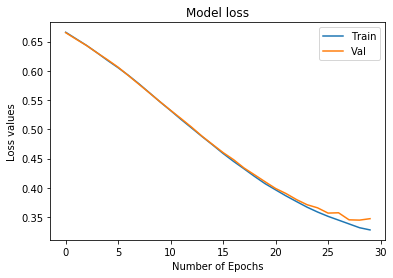

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss values')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

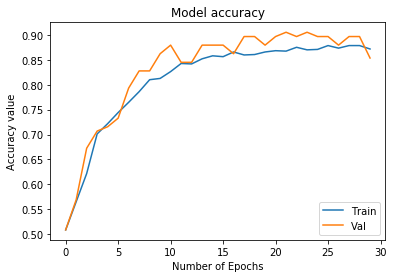

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()